### Feature Selection with Python

Feature selection methods in Python  
Tareq Haboukh

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import VarianceThreshold
from itertools import compress
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, confusion_matrix

Dataset = pd.read_csv("Dataset.csv")
df = pd.DataFrame(Dataset)

In [1]:
def Logistic_Regression():

    y = df.loc[:, df.columns == 'gnd']
    x = df.loc[:, (df.columns != 'gnd') & (df.columns !='ID')]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    
    lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
    lr_model.fit(x_train, y_train.values.ravel())
    
    y_pred = lr_model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of the logistic regression model on test set: %3f" %accuracy)

In [2]:
def Logistic_Regression_Variance_filter(VT):
    selector = VarianceThreshold(threshold=VT)
    selected_features = selector.fit_transform(df)
    selector.get_params()

    features_selected_VarianceThreshold = list(compress(df.columns, selector.get_support()))

    df_new = df.filter(features_selected_VarianceThreshold)
    y = df_new.loc[:, df_new.columns == 'gnd']
    x = df_new.loc[:, (df_new.columns != 'gnd') & (df_new.columns !='ID')]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
    lr_model.fit(x_train, y_train.values.ravel())
    
    y_pred = lr_model.predict(x_test)    
    
    # Model Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return(VT,accuracy)

In [3]:
# Low Variance Filter
def low_variance_filter(threshold):
    variance = df.var()
    features = df.columns
    selectedVariables = []
    for i in range(0, len(df.columns)):
        if variance[i] >= threshold:
            selectedVariables.append(features[i])
    return selectedVariables

In [6]:
df.rename(columns = {'Unnamed: 0' : 'ID'}, inplace = True)

#### 1. Look at the shape of the dataset and print out the number of features. (gnd is the target variable)

In [7]:
df.shape

(800, 258)

In [8]:
features_count = df.columns.str.contains("fea.").sum()
print("The dataset has {}".format(features_count) + " features")

The dataset has 256 features


#### 2. Apply the Logistic Regression model on the given dataset and get the accuracy of the model.

In [9]:
Logistic_Regression()

Accuracy of the logistic regression model on test set: 0.987500


#### 3. Remove low variance features set the threshold = 0.1, 0.2, 0.3, and 0.4

In [11]:
# Threshold = 0.1
Threshold_1 = low_variance_filter(0.1)

# Threshold = 0.2
Threshold_2 = low_variance_filter(0.2)

# Threshold = 0.3
Threshold_3 = low_variance_filter(0.3)

# Threshold = 0.4
Threshold_4 = low_variance_filter(0.4)

#### 4. Print out the new datasets with selected features.

In [13]:
# Dataset with 0.1 Variance Threshold
df[Threshold_1].head()

,ID,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,fea.11,fea.19,fea.20,...,fea.244,fea.245,fea.246,fea.247,fea.248,fea.249,fea.250,fea.251,fea.252,gnd
0,1,-0.774192,-0.275283,0.034194,-0.399883,-0.815319,-0.955680,-0.989120,-0.987214,-0.844745,...,-0.183571,0.170864,0.365778,0.414430,0.427150,0.404087,0.213519,-0.104366,-0.444652,0
1,2,-0.901515,-0.545999,0.030940,0.411866,0.390567,0.008434,-0.502208,-0.997706,-0.952953,...,-0.979200,-0.858993,-0.527557,-0.043773,0.358344,0.374951,-0.040142,-0.586220,-0.911391,0
2,3,-0.961828,-0.717215,-0.144694,0.092191,-0.260683,-0.687438,-0.925676,-0.986465,-0.932243,...,-0.894444,-0.636530,-0.257442,0.153603,0.414912,0.334299,-0.060454,-0.541605,-0.867137,0
3,4,-0.832602,-0.368054,-0.080497,-0.246663,-0.263954,-0.317376,-0.699568,-0.999915,-0.992487,...,-0.942932,-0.684969,-0.164910,0.306974,0.480128,0.487418,0.356270,-0.015310,-0.530088,0
4,5,-0.988678,-0.829627,-0.330878,0.013998,-0.345315,-0.803120,-0.973332,-0.999992,-0.999126,...,-0.999747,-0.988999,-0.851968,-0.406307,0.080920,0.086649,-0.458626,-0.885111,-0.993165,0


In [14]:
# Dataset with 0.2 Variance Threshold
df[Threshold_2].head()

,ID,fea.6,fea.7,fea.20,fea.21,fea.22,fea.23,fea.24,fea.25,fea.26,...,fea.235,fea.236,fea.237,fea.245,fea.246,fea.247,fea.248,fea.249,fea.250,gnd
0,1,-0.275283,0.034194,-0.844745,-0.336824,0.331032,0.504431,0.130807,-0.319797,-0.623297,...,0.522361,0.366751,-0.082735,0.170864,0.365778,0.414430,0.427150,0.404087,0.213519,0
1,2,-0.545999,0.030940,-0.952953,-0.659959,0.035736,0.653449,0.839105,0.688151,0.494709,...,0.013770,-0.672177,-0.956167,-0.858993,-0.527557,-0.043773,0.358344,0.374951,-0.040142,0
2,3,-0.717215,-0.144694,-0.932243,-0.783630,-0.349874,0.450019,0.764206,0.530335,-0.029652,...,0.208939,-0.459925,-0.888110,-0.636530,-0.257442,0.153603,0.414912,0.334299,-0.060454,0
3,4,-0.368054,-0.080497,-0.992487,-0.873086,-0.403134,0.222510,0.448349,0.516625,0.364233,...,0.632486,0.047866,-0.706772,-0.684969,-0.164910,0.306974,0.480128,0.487418,0.356270,0
4,5,-0.829627,-0.330878,-0.999126,-0.970712,-0.667495,0.090387,0.504988,0.267632,-0.399843,...,-0.718008,-0.980233,-0.999657,-0.988999,-0.851968,-0.406307,0.080920,0.086649,-0.458626,0


In [15]:
# Dataset with 0.3 Variance Threshold
df[Threshold_3].head()

,ID,fea.21,fea.22,fea.26,fea.27,fea.37,fea.38,fea.43,fea.44,fea.52,...,fea.220,fea.221,fea.228,fea.229,fea.230,fea.231,fea.234,fea.235,fea.236,gnd
0,1,-0.336824,0.331032,-0.623297,-0.835472,0.235636,0.540066,-0.274300,-0.644889,-0.081776,...,0.505857,0.495046,0.339861,0.368924,0.320216,0.299545,0.518921,0.522361,0.366751,0
1,2,-0.659959,0.035736,0.494709,0.140118,-0.264202,0.538892,0.384775,-0.081463,-0.657173,...,-0.221164,-0.808547,-0.866280,-0.422491,0.192044,0.536542,0.611095,0.013770,-0.672177,0
2,3,-0.783630,-0.349874,-0.029652,-0.631342,-0.200933,0.200376,-0.038264,-0.642408,0.240669,...,0.051250,-0.718346,-0.482285,0.110328,0.541402,0.769359,0.670917,0.208939,-0.459925,0
3,4,-0.873086,-0.403134,0.364233,-0.333441,-0.960678,-0.708190,-0.296770,-0.865733,-0.999613,...,0.376856,-0.547731,-0.787279,-0.161113,0.451871,0.598882,0.788175,0.632486,0.047866,0
4,5,-0.970712,-0.667495,-0.399843,-0.870560,-0.939941,-0.507406,-0.656211,-0.963497,-0.993818,...,-0.949420,-0.997999,-0.997320,-0.943469,-0.586251,0.118789,-0.001911,-0.718008,-0.980233,0


In [16]:
# Dataset with 0.4 Variance Threshold
df[Threshold_4].head()

,ID,fea.43,fea.53,fea.54,fea.60,fea.69,fea.70,fea.72,fea.76,fea.85,...,fea.203,fea.204,fea.205,fea.212,fea.213,fea.219,fea.220,fea.229,fea.230,gnd
0,1,-0.274300,0.537992,0.294486,0.015796,0.511609,-0.166338,-0.920920,0.186746,0.241829,...,-0.582717,-0.143460,0.405317,-0.050328,-0.430388,0.195612,0.505857,0.368924,0.320216,0
1,2,0.384775,0.166035,0.792276,0.293105,0.484311,0.875532,-0.293676,0.413152,0.618632,...,0.796826,0.345453,-0.523125,-0.599433,0.186843,0.518896,-0.221164,-0.422491,0.192044,0
2,3,-0.038264,0.613838,0.783930,-0.054780,0.950433,0.970910,0.861389,0.546542,0.936660,...,0.842856,0.311613,-0.580125,0.199657,0.624014,0.713256,0.051250,0.110328,0.541402,0
3,4,-0.296770,-0.984852,-0.800620,-0.927408,-0.945566,-0.611553,0.795796,-0.885091,-0.822636,...,0.544515,0.510231,-0.398164,-0.583682,0.302478,0.749417,0.376856,-0.161113,0.451871,0
4,5,-0.656211,-0.886214,-0.360784,-0.883866,-0.775522,-0.106894,-0.419718,-0.759592,-0.685957,...,-0.349981,-0.878587,-0.993249,-0.989981,-0.832672,-0.549340,-0.949420,-0.943469,-0.586251,0


#### 5. Apply the Logistic Regression model on each of these datasets and get the accuracy scores.

In [17]:
yaxis = []
xaxis = []

variance_list = [0.1, 0.2, 0.3, 0.4]

for i in variance_list:
    x,y = Logistic_Regression_Variance_filter(i)
    xaxis.append(x)
    yaxis.append(y)
    
for i in range(len(xaxis)):
    print("Variance: {} Model Accuracy: {}".format(xaxis[i],yaxis[i].round(3)))

Variance: 0.1 Model Accuracy: 0.988
Variance: 0.2 Model Accuracy: 0.992
Variance: 0.3 Model Accuracy: 0.988
Variance: 0.4 Model Accuracy: 0.946


#### 6. Compare the accuracy scores and define does the feature selection improve the model or not.

The differences between accuracies are small but it is worth mentioning that by increasing the variance threshold the accuracy tends to go lower usually at 0.4.

#### 7. Show the of accuracy scores on a plot (line chart).

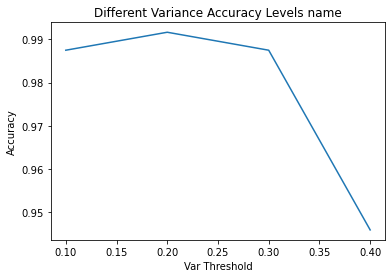

In [18]:
line_x = np.array(xaxis)
line_y = np.array(yaxis)


plt.plot(line_x,line_y)
plt.title('Different Variance Accuracy Levels name')
plt.xlabel('Var Threshold')
plt.ylabel('Accuracy')
plt.show()